In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Series objects

In [13]:
a = pd.Series([30,29,31], index=["Itapipoca", "Fortaleza", "Caucaia"], name="temp", dtype=float)
print(a)

Itapipoca    30.0
Fortaleza    29.0
Caucaia      31.0
Name: temp, dtype: float64


In [52]:
# distância em relação a capital
distance_city = {
    "Itapipoca": 164.0,
    "Quixadá": 171.0,
    "Caucaia": 16.3,
    "Sobral": 263.0,
    "Baturité": 103.0,
    "Catolé do Rocha": 437.0
}

y = pd.Series(distance_city, name="Distância das cidades em relação a capital")
print(y)
print()

paraiba = pd.Series(distance_city, index=["Catolé do Rocha"], name="Distância das cidades em relação a capital - Paraiba")
print(paraiba)

print(f"")

print()
print("Acesso por índice:")
print(f"{y.index[0]}: {y.iloc[0]}") # iloc acessa por índice
print(f"{y.loc['Quixadá']}") # loc acessa por chave

Itapipoca          164.0
Quixadá            171.0
Caucaia             16.3
Sobral             263.0
Baturité           103.0
Catolé do Rocha    437.0
Name: Distância das cidades em relação a capital, dtype: float64

Catolé do Rocha    437.0
Name: Distância das cidades em relação a capital - Paraiba, dtype: float64


Acesso por índice:
Itapipoca: 164.0
171.0


[4.4 5.1 6.1 6.2 6.1 6.1 5.7 5.2 4.7 4.1 3.9 3.5]
[5.4 6.1 7.1 7.2 7.1 7.1 6.7 6.2 5.7 5.1 4.9 4.5]


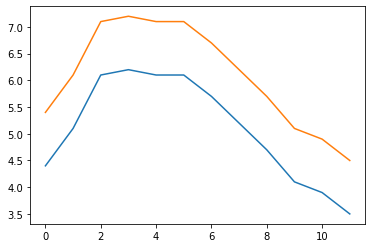

In [10]:
temperatures1 = np.array([4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5])
s1 = pd.Series(temperatures1, name="Temperaturas")

temperatures2 = temperatures1 + 1
s2 = pd.Series(temperatures2, name="Temperaturas")

print(temperatures1)
print(temperatures2)

s1.plot(label="Temperaturas normais")
s2.plot(label="Temperaturas pós efeito estufa")
plt.show()

# Handling time

In [9]:
dates = pd.date_range('1999/07/21 5:30pm', periods=12, freq='H')
print(dates)

DatetimeIndex(['1999-07-21 17:30:00', '1999-07-21 18:30:00',
               '1999-07-21 19:30:00', '1999-07-21 20:30:00',
               '1999-07-21 21:30:00', '1999-07-21 22:30:00',
               '1999-07-21 23:30:00', '1999-07-22 00:30:00',
               '1999-07-22 01:30:00', '1999-07-22 02:30:00',
               '1999-07-22 03:30:00', '1999-07-22 04:30:00'],
              dtype='datetime64[ns]', freq='H')


1999-07-21 17:30:00    4.4
1999-07-21 18:30:00    5.1
1999-07-21 19:30:00    6.1
1999-07-21 20:30:00    6.2
1999-07-21 21:30:00    6.1
1999-07-21 22:30:00    6.1
1999-07-21 23:30:00    5.7
1999-07-22 00:30:00    5.2
1999-07-22 01:30:00    4.7
1999-07-22 02:30:00    4.1
1999-07-22 03:30:00    3.9
1999-07-22 04:30:00    3.5
Freq: H, dtype: float64


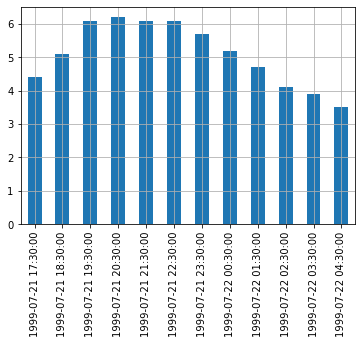

In [16]:
temp_series = pd.Series(temperatures1,dates)
print(temp_series)
temp_series.plot(kind='bar')
plt.grid(True)
plt.show()

1999-07-21 16:00:00    4.40
1999-07-21 18:00:00    5.60
1999-07-21 20:00:00    6.15
Freq: 2H, dtype: float64


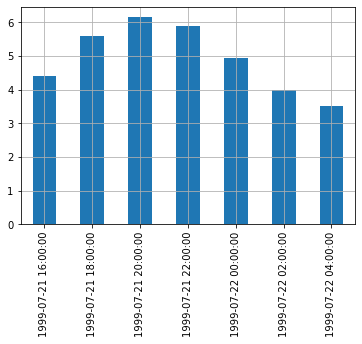

In [26]:
temp_series_freq_2H = temp_series.resample('2H')
temp_series_freq_2H = temp_series_freq_2H.mean()
temp_series_freq_2H.plot(kind='bar')

print(temp_series_freq_2H.head(3)) # pega os n primeiros

plt.grid(True)
plt.show()

# DataFrame objects

In [58]:
sexo = pd.Series(['M','F','F','M'], ["Marcos Paulo", "Marta", "Sara", "Paulo"])
people_dict = {
    "Idade": pd.Series([15,42,53,22], ["Sara", "Marta", "Paulo", "Marcos Paulo"]),
    "Aniversário": pd.Series(['17/06/1979', '25/11/1968', '07/04/2006', '21/07/1999'], ["Marta", "Paulo", "Sara", "Marcos Paulo"]),
    "Sexo": sexo,
    "Peso": pd.Series([80.5], ["Marcos Paulo"]),
    "Filhos": pd.Series([2,2], ["Marta", "Paulo"])
}

people = pd.DataFrame(people_dict)

print(people["Aniversário"].max())
people

25/11/1968


,Idade,Aniversário,Sexo,Peso,Filhos
Marcos Paulo,22,21/07/1999,M,80.5,NaN
Marta,42,17/06/1979,F,NaN,2.0
Paulo,53,25/11/1968,M,NaN,2.0
Sara,15,07/04/2006,F,NaN,NaN


In [63]:
d2 = pd.DataFrame(
    people_dict,
    columns=["Idade", "Aniversário", "Sexo", "Peso", "Filhos", "Hobby"],
    index=["Marcos Paulo", "Marta", "Paulo", "Sara", "Judite"]
)
d2

,Idade,Aniversário,Sexo,Peso,Filhos,Hobby
Marcos Paulo,22.0,21/07/1999,M,80.5,NaN,NaN
Marta,42.0,17/06/1979,F,NaN,2.0,NaN
Paulo,53.0,25/11/1968,M,NaN,2.0,NaN
Sara,15.0,07/04/2006,F,NaN,NaN,NaN
Judite,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# o problema dessa forma de criar é que os indices devem ser colocados nas suas respectivas linhas
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [77]:
d4 = pd.DataFrame(
    d2,
    columns=["Idade", "Sexo"],
    index=["Marcos Paulo", "Marta", "Judite"]
)
d4

,Idade,Sexo
Marcos Paulo,22.0,M
Marta,42.0,F
Judite,NaN,NaN


In [18]:
people = pd.DataFrame({
    "Aniversário": {"MP": 1999, "Marta": 1979, "Paulo": 1968, "Sara": 2006},
    "Hobby": {"MP": "Ler, jogar", "Paulo": "Jogar", "Sara": "Ler", "Marta":"Jogar"}
})
people

,Aniversário,Hobby
MP,1999,"Ler, jogar"
Marta,1979,Jogar
Paulo,1968,Jogar
Sara,2006,Ler


In [2]:
d5 = pd.DataFrame(
    {
        ("public", "birthday"):
            { ("Paris", "Alice"):1985, ("Paris", "Bob"): 1984, ("London", "Charles"):1992 },
        ("public", "hobby"):
            { ("Paris", "Alice"): "Biking", ("Paris", "Bob"): "Dancing" },
        ("private", "weight"):
            { ("Paris", "Alice"): 68, ("Paris", "Bob"):83, ("London", "Charles"): 112 },
        ("private", "children"):
            { ("Paris", "Alice"): np.nan, ("Paris", "Bob"): 3, ("London", "Charles"): 0 }
    }
)
d5

public          private         
               birthday    hobby  weight children
Paris  Alice       1985   Biking      68      NaN
       Bob         1984  Dancing      83      3.0
London Charles     1992      NaN     112      0.0

In [9]:
d5["public"]

birthday    hobby
Paris  Alice        1985   Biking
       Bob          1984  Dancing
London Charles      1992      NaN

In [12]:
d5["private"]
d5["private", "children"]
a = d5["private", "weight"] * 2
print(a)

Paris   Alice      136
        Bob        166
London  Charles    224
Name: (private, weight), dtype: int64


In [13]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthday    hobby  weight  children
Paris  Alice        1985   Biking      68       NaN
       Bob          1984  Dancing      83       3.0
London Charles      1992      NaN     112       0.0

In [14]:
d6 = d5.T # Matriz transposta
d6

Paris           London
           Alice      Bob Charles
birthday    1985     1984    1992
hobby     Biking  Dancing     NaN
weight        68       83     112
children     NaN      3.0     0.0

In [15]:
# Não entendi os métodos stack() e unstack(), principalmente quando entra os níveis
d7 = d6.stack()
d7

London    Paris
birthday Alice      NaN     1985
         Bob        NaN     1984
         Charles   1992      NaN
hobby    Alice      NaN   Biking
         Bob        NaN  Dancing
weight   Alice      NaN       68
         Bob        NaN       83
         Charles    112      NaN
children Bob        NaN      3.0
         Charles    0.0      NaN

In [16]:
d8 = d7.unstack()
d8

London                Paris                 
          Alice  Bob Charles   Alice      Bob Charles
birthday    NaN  NaN    1992    1985     1984     NaN
children    NaN  NaN     0.0     NaN      3.0     NaN
hobby       NaN  NaN     NaN  Biking  Dancing     NaN
weight      NaN  NaN     112      68       83     NaN

In [20]:
people

,Aniversário,Hobby
MP,1999,"Ler, jogar"
Marta,1979,Jogar
Paulo,1968,Jogar
Sara,2006,Ler


### Slice

In [172]:
people.loc["MP"] # acesso por key
people.iloc[-1] # ultimo
people.iloc[1:-1] # do segundo até o penúltimo
people[np.array([True, True, False, True])] # acessa os elementos True
people[people["Aniversário"] >= 2000] # elementos que obdecem a condicional

,Aniversário,Hobby
Sara,2006,Ler


### Adicionar e remover colunas

In [30]:
people["Idade"] = 2021 - people["Aniversário"] # isso adiciona uma coluna com a idade
people["+18"] = people["Idade"] >= 18
birthdays = people.pop("Aniversário") # o método pop(n) remove n do dataframe
del people["Hobby"] # deleta
people

,Peso,Altura,Pets,Idade,+18
MP,80.0,185,1.0,22,True
Marta,80.0,175,NaN,42,True
Paulo,75.5,175,1.0,53,True
Sara,60.3,178,5.0,15,False


In [34]:
people["Pets"] = pd.Series( { "MP": 1, "Sara":5, "Paulo": 1, "Judite": 3 } ) # Judite é desconsiderada, ja que n está no dataframe
people.insert(2, "Peso", [80.0, 80.0, 75.5, 60.3]) # primeiro args é o índice, segundo é o título e o terceiro é os valores
#del people["Peso"]
people

,Altura,Pets,Peso,Idade,+18
MP,185,1.0,80.0,22,True
Marta,175,NaN,80.0,42,True
Paulo,175,1.0,75.5,53,True
Sara,178,5.0,60.3,15,False


In [35]:
people["Altura"] = pd.Series( { "MP": 185 , "Marta": 175, "Paulo": 175, "Sara": 178} )
people = people.assign(
    tem_pet = people["Pets"] > 0,
    imc =  people["Peso"] / (people["Altura"]/100)**2
)

In [36]:
(people
     .assign(body_mass_index = lambda df: df["Peso"] / (df["Altura"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,Altura,Pets,Peso,Idade,+18,tem_pet,imc,body_mass_index,overweight
MP,185,1.0,80.0,22,True,True,23.374726,23.374726,False
Marta,175,NaN,80.0,42,True,False,26.122449,26.122449,True
Paulo,175,1.0,75.5,53,True,True,24.653061,24.653061,False
Sara,178,5.0,60.3,15,False,True,19.031688,19.031688,False


In [37]:
people.eval("body_mass_index = Peso / (Altura/100) ** 2", inplace = True)
people

,Altura,Pets,Peso,Idade,+18,tem_pet,imc,body_mass_index
MP,185,1.0,80.0,22,True,True,23.374726,23.374726
Marta,175,NaN,80.0,42,True,False,26.122449,26.122449
Paulo,175,1.0,75.5,53,True,True,24.653061,24.653061
Sara,178,5.0,60.3,15,False,True,19.031688,19.031688


In [40]:
# @ é pra acessar uma variável global
limite_excesso_peso = 30
people.eval("acima_do_peso = body_mass_index > @limite_excesso_peso", inplace=True) #inplace é um boolean que determina se vai pro dataframe ou não

In [44]:
people.query("Idade > 30 and tem_pet == True") # query(n) retorna um dataframe com os elementos que satisfazem as n condições

,Altura,Pets,Peso,Idade,+18,tem_pet,imc,body_mass_index,acima_do_peso
Paulo,175,1.0,75.5,53,True,True,24.653061,24.653061,False


In [63]:
people.sort_index(ascending=False) # se eu der inplace=True ele modifica o dataframe; Tbm tem axis 

,Altura,Pets,Peso,Idade,+18,tem_pet,imc,body_mass_index,acima_do_peso
Sara,178,5.0,60.3,15,False,True,19.031688,19.031688,False
Paulo,175,1.0,75.5,53,True,True,24.653061,24.653061,False
Marta,175,NaN,80.0,42,True,False,26.122449,26.122449,False
MP,185,1.0,80.0,22,True,True,23.374726,23.374726,False


# Operações com DataFrames

In [119]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["set", "out", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

,set,out,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [69]:
np.sqrt(grades)

,sep,out,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [70]:
grades+1

,sep,out,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


In [71]:
grades>=7

,sep,out,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


In [78]:
print(f"média por pessoa:\n{grades.mean(axis=1)}")
print()
print(f"média por mês:\n{grades.mean(axis=0)}")

média por pessoa:
alice      8.333333
bob        9.333333
charles    4.666667
darwin     9.666667
dtype: float64

média por mês:
sep    7.75
out    8.75
nov    7.50
dtype: float64


In [82]:
print((grades>5).all(axis=1))
print()
print((grades>5).all(axis=0))

alice       True
bob         True
charles    False
darwin      True
dtype: bool

sep    False
out     True
nov    False
dtype: bool


In [88]:
grades - grades.mean()
grades.index
grades.columns

Index(['sep', 'out', 'nov'], dtype='object')

In [91]:
pd.DataFrame([grades.mean()]*4, index = grades.index, columns=grades.columns)

,sep,out,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


In [94]:
grades.values # me retorna um array com apenas os valores
grades - grades.values.mean()

,sep,out,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


In [99]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["out", "nov", "dez"], index=["bob","colin", "darwin", "charles"])
bonus_points

,out,nov,dez
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [100]:
grades + bonus_points

,dez,nov,out,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [106]:
(grades + bonus_points).fillna(0) # fillna(n) muda tudo que é NaN para n

,dez,nov,out,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [126]:
fixed_bonus_points = bonus_points.fillna(0)
#fixed_bonus_points.insert(0,'set',0)
fixed_bonus_points.loc["alice"] = 0

print(grades)
print()
print(fixed_bonus_points)
print()

print(fixed_bonus_points + grades)

         set  out  nov
alice      8    8    9
bob       10    9    9
charles    4    8    2
darwin     9   10   10

         set  out  nov  dez
bob        0  0.0  0.0  2.0
colin      0  0.0  1.0  0.0
darwin     0  0.0  1.0  0.0
charles    0  3.0  3.0  0.0
alice      0  0.0  0.0  0.0

         dez   nov   out   set
alice    NaN   9.0   8.0   8.0
bob      NaN   9.0   9.0  10.0
charles  NaN   5.0  11.0   4.0
colin    NaN   NaN   NaN   NaN
darwin   NaN  11.0  10.0   9.0


In [132]:
bonus_points.interpolate(axis=1)

,set,out,nov,dez
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0


In [130]:
bonus_points

,set,out,nov,dez
bob,0,0.0,NaN,2.0
colin,0,NaN,1.0,0.0
darwin,0,0.0,1.0,0.0
charles,0,3.0,3.0,0.0


In [151]:
better_bonus_points = bonus_points.copy()
better_bonus_points.loc["alice"] = 0
print(better_bonus_points)
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

         set  out  nov  dez
bob        0  0.0  NaN  2.0
colin      0  NaN  1.0  0.0
darwin     0  0.0  1.0  0.0
charles    0  3.0  3.0  0.0
alice      0  0.0  0.0  0.0


,set,out,nov,dez
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [155]:
grades +  better_bonus_points
grades["dez"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,set,out,nov,dez
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


In [157]:
final_grades_clean = final_grades.dropna(how="all") # dropna() remove as linhas com NaN
final_grades_clean

,set,out,nov,dez
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


In [159]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all") # dropna(axis=1) remove as colunas com NaN
final_grades_clean

,set,out,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0
